# Convergence of the Metropolis Sampling

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import numpy.random as rd
import copy
import os
import warnings
cwd = os.getcwd()
import seaborn as sns

sns.set()

# Retrieve simulation parameters

simulationParameters = np.loadtxt('simulationParameters.txt')

NSITES = int(simulationParameters[0])
dt = simulationParameters[1]
beta = simulationParameters[2]
L = int(simulationParameters[3])
t = simulationParameters[4]
U = simulationParameters[5]
mu = simulationParameters[6]
totalMCSweeps = int(simulationParameters[7])
freq = int(simulationParameters[8])
intsize = int(simulationParameters[9])

# Load weights to plot

weights_signs = np.loadtxt('weights.txt')

weights = weights_signs[:, 0]

M = weights.size

time = np.arange(M)   #measured in sweeps

directory1 = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

directory2 = (str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu) + '/data-to-reproduce')
            
if not os.path.exists(directory1):
    os.makedirs(directory1)
    
if not os.path.exists(directory2):
    os.makedirs(directory2)
    
np.savetxt(directory2 + '/weights_' + \
           'totalMCSweeps_' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (weights))
np.savetxt(directory2 + '/simulationParameters_' + \
           'totalMCSweeps_' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '_intsize_' + str(intsize) + '.txt', (simulationParameters))

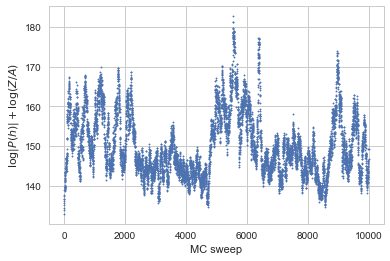

In [40]:
sns.set_style("whitegrid")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
plt.scatter(time, np.log(abs(weights)), s = 2)
plt.xlabel('MC sweep')
plt.ylabel(r'$\log | P(h) | + \log (Z/A)$')
plt.savefig(directory1 + '/weightsVsMCstep' + str(totalMCSweeps) + 'sweeps' + \
            '_freq_' + str(freq) + '.png', dpi = 600)

# Sign problem

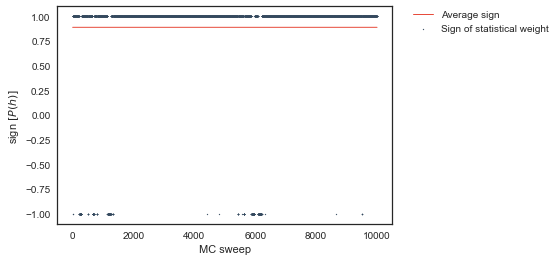

In [41]:
sns.set_style("white")
signs = weights_signs[:, 1]
avSign = np.mean(signs) * np.ones(len(time))
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.set_color_codes("dark")

fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.xlabel('MC sweep')
plt.ylabel('sign' + r' $[P(h)]$ ')

ax.scatter(time, signs, s = 1, color = "#34495e", label = 'Sign of statistical weight')
ax.plot(time, avSign, linewidth = 1, color = "#e74c3c", label = 'Average sign')
lgd = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(directory1 + '/avSign' + str(totalMCSweeps) + 'sweeps' + \
            '_freq_' + str(freq) + '.png', dpi = 600, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [43]:
avSign[0]

0.89000000000000001

# Measuring electron density

In [31]:
electronDensity = np.loadtxt('electronDensity.txt')
np.savetxt(directory2 + '/electronDensity' + str(totalMCSweeps) + \
           '_freq_' + str(freq) + '.txt', (electronDensity))

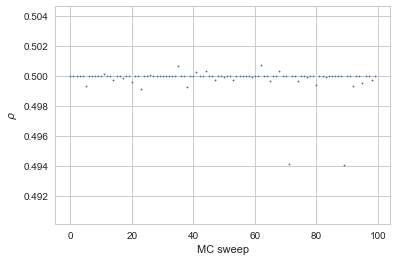

In [38]:
sweep = np.arange(totalMCSweeps)
plt.scatter(sweep, electronDensity, s = 2)
plt.xlabel('MC sweep')
plt.ylabel(r'$\rho$')
plt.savefig(directory1 + '/electronDensity' + str(totalMCSweeps) + 'sweeps' + \
            '_freq_' + str(freq) + '.png', dpi = 600)

# Auto-correlation time